# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [4]:
import pandas as pd
import numpy as np

df=pd.read_csv('airbnb_NYC.csv',
                 encoding='latin1')

#1.1
print(df['Price'].min(), df['Price'].max())
df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '').astype(float)
print(df['Price'].min(), df['Price'].max())
df['Price'].isna().sum()
# To clean price, I used the hint to see that the price column was stored as text and found the min and max to confirm it as true. Prices over 999 
# had commas and dollar signs which made them not register as numbers, so I removed those characters and converted the column to float type. 
# Finally, I confirmed the cleaning by checking the min and max again. There are also 0 nan values in the price column.

1,000 999
10.0 10000.0


np.int64(0)

In [5]:
#1.2

mn = pd.read_csv('mn_police_use_of_force.csv')
print(mn['subject_injury'].value_counts(), mn['subject_injury'].isna().sum())

mn['subject_injury'] = mn['subject_injury'].fillna('Missing')
print(mn['subject_injury'].value_counts())

print(9848/(9848+1631+1446)) #Missing proportion is ~76.2%

pd.crosstab(
    mn["force_type"],
    mn["subject_injury"],
    dropna=False
)
#A common pattern for missing data occurs when Bodily Force or Chemical Irritant is used. This to me shows that the 
# "Missing" category is not arbitrary.

subject_injury
Yes    1631
No     1446
Name: count, dtype: int64 9848
subject_injury
Missing    9848
Yes        1631
No         1446
Name: count, dtype: int64
0.7619342359767892


subject_injury,Missing,No,Yes
force_type,,,
Baton,2,0,2
Bodily Force,7051,1093,1286
Chemical Irritant,1421,131,41
Firearm,0,2,0
Gun Point Display,27,33,44
Improvised Weapon,74,34,40
Less Lethal,87,0,0
Less Lethal Projectile,0,1,2
Maximal Restraint Technique,170,0,0


In [6]:
#1.3
mb = pd.read_csv('data/metabric.csv')
mb['Overall Survival Status']=mb['Overall Survival Status'].str[0]
mb

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1,YES,5.230071,31.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,70.65,BREAST CONSERVING,Breast Cancer,NO,NO,0.0,9.0,2.040,201.166667,0,YES,11.767659,20.0,1.0
1339,75.62,MASTECTOMY,Breast Cancer,NO,NO,0.0,4.0,4.040,105.200000,1,NO,5.230071,20.0,1.0
1340,52.84,BREAST CONSERVING,Breast Cancer,YES,NO,6.0,5.0,5.040,200.333333,0,YES,6.537589,20.0,2.0
1341,48.59,MASTECTOMY,Breast Cancer,YES,NO,1.0,6.0,5.060,14.700000,1,YES,7.845106,30.0,2.0


In [7]:
#1.4

df=pd.read_csv('airbnb_NYC.csv',
                 encoding='latin1')
df['Review Scores Rating'].isna().sum()

median=df["Review Scores Rating"].median()
print(median)
df["Review Scores Rating"] = df["Review Scores Rating"].fillna(median)

#This will heavily bias the results because the missing values are not random and are from air bnbs that just don't 
# have any reviews. When we put these results in with the median, we are assuming that these air bnbs have an average 
# rating, which is not true by any means. We are better off either leaving these values as missing and updating them when
# they do get reviews, or creating a new column that will show that they are missing a review score.

94.0


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [136]:
#1
shrk = pd.read_excel('GSAF5.xls')
shrk.head()


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:

#2
shrk = df.dropna(axis=1, how='all')
shrk.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source,pdf,href formula,href,Case Number,Case Number.1
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,Right thigh and lower leg stripped of flesh,Y,?,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,No injury shark knocked man of his board,N,1100hrs,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,Puncture wounds to right knee,N,1815hrs,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,Minor cuts and abrasions,N,0830hrs,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,None reported damage to board,N,1145hrs,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN


In [138]:
#3: One observation in this dataset is equivalent to one shark attack. Each row has all the information of one single recorded shark attack on one specific human being. This matters for the 
#cleaning of our data because we cannot drop any rows as that would mean dropping an entire shark attack, which is a unique observation. We can only drop columns that are not relevant to our analysis
# or have too many missing values.

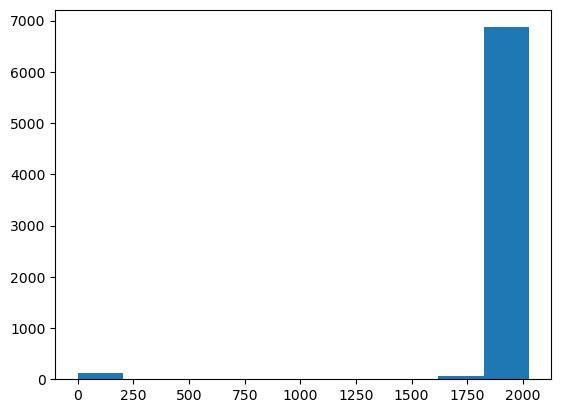

0.0 2026.0


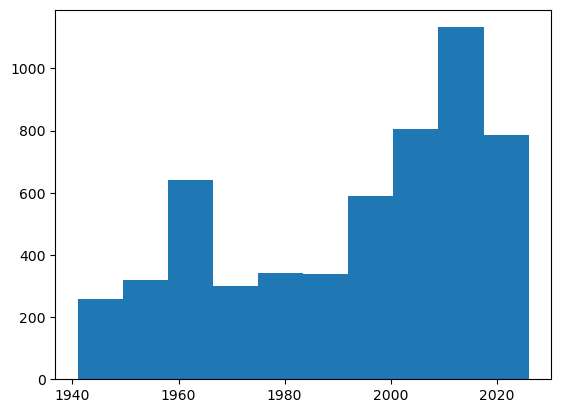

In [139]:
#4: 
import matplotlib.pyplot as plt
plt.hist(shrk['Year'])
plt.show()
print(shrk['Year'].min(), shrk['Year'].max())
# The range goes from 0 to 2026 with around nothing inbetween, so they have some super old shark attacks in the dataset we should remove.
shrk2 = shrk[shrk['Year'] > 1940]
plt.hist(shrk2['Year'])
plt.show()
#There is a spike of shark attacks around 1960 and then it goes back down until around 2000 where it starts to increase again.

(array([ 32., 308., 870., 654., 601., 413., 315., 208., 212., 137.,  92.,
         44.,  27.,   7.,   5.]),
 array([ 1.        ,  6.73333333, 12.46666667, 18.2       , 23.93333333,
        29.66666667, 35.4       , 41.13333333, 46.86666667, 52.6       ,
        58.33333333, 64.06666667, 69.8       , 75.53333333, 81.26666667,
        87.        ]),
 <BarContainer object of 15 artists>)

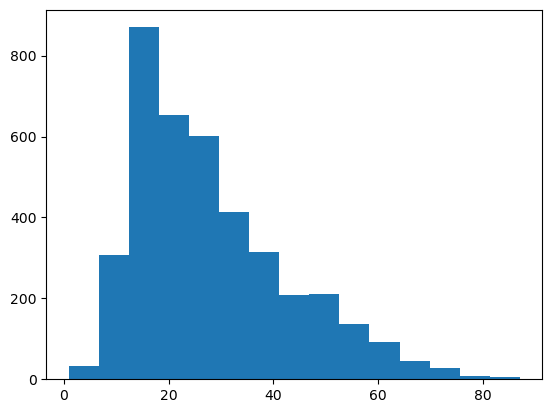

In [140]:
#5
shrk['Age'] = pd.to_numeric(shrk['Age'], errors='coerce')
(shrk['Age'].dropna())
plt.hist(shrk['Age'], bins = 15)


In [141]:
#6
print(shrk['Type'].value_counts())
shrk['Type'] = shrk['Type'].str.replace('Invalid', 'Unknown')
shrk['Type'] = shrk['Type'].str.replace('Questionable', 'Unknown')
shrk['Type'] = shrk['Type'].str.replace('Unconfirmed', 'Unknown')
shrk['Type'] = shrk['Type'].str.replace('?', 'Unknown')
shrk['Type'] = shrk['Type'].str.replace('Unverified', 'Unknown')
shrk['Type'] = shrk['Type'].str.replace('Under investigation', 'Unknown')
shrk['Type'] = shrk['Type'].str.replace(' Provoked', 'Provoked')
shrk['Type'] = shrk['Type'].str.replace('unprovoked', 'Unprovoked')
shrk['Type'] = shrk['Type'].str.replace('Boat', 'Unprovoked')
shrk['Type'] = shrk['Type'].str.replace('Watercraft', 'Unprovoked')
shrk['Type'] = shrk['Type'].str.replace('Sea Disaster', 'Unprovoked')

print(5830/(5830+644)) #The proportion of unprovoked attacks is around 90.1%.

Type
Unprovoked             5225
Provoked                642
Invalid                 552
Watercraft              355
Sea Disaster            242
Questionable             26
Boat                      7
 Provoked                 2
unprovoked                1
Unconfirmed               1
?                         1
Unverified                1
Under investigation       1
Name: count, dtype: int64
0.9005251776336114


In [158]:
#6.

print(shrk['Fatal Y/N'].value_counts())
a = shrk['Fatal Y/N']
a = a.astype(str)

a=a.str.replace('M','Unknown')
a=a.str.replace('n','N')
a=a.str.replace('Nq','N')
a=a.str.replace('UNKNOWN','Unknown')
a=a.str.replace('UNkNowN','Unknown')
a=a.str.replace('F','Unknown')
a=a.str.replace('NaN','Unknown')
a=a.str.replace('2017','Unknown')
a=a.str.replace('Y x 2','Y')
a=a.str.replace(' N','N')
a=a.str.replace('N ','N')
a=a.str.replace('y','Y')

shrk['Fatal Y/N'] = a
print(1470/(1470+4880)) #The proportion of fatal attacks is around 23.1%

Fatal Y/N
N          4943
Y          1490
Unknown     641
Name: count, dtype: int64
0.231496062992126


In [161]:
#8
print(pd.crosstab(shrk['Fatal Y/N'], shrk['Type']))
#The attack is definitely more likely to be fatal if it's unprovoked. My thoughts are that hopefully a shark will never want to mess with me.

Type       Provoked  Unknown  Unprovoked
Fatal Y/N                               
N               614       34        4286
Unknown           9      532          95
Y                21       16        1449


**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

In [ ]:
#1: The paper is about tidying data which is just the process of how a dataset is structured to make them easier to use and analyze. The author introduces the standard for tidy data as 
# having each variable as a column, observation as a row, and having observational units form their own tables. The standard for tidy data is argued by the author to simplify analysis.

#2: The tidy data standard is intended to make structuring data consistent and to organize datasets in a way that makes cleaning and analysis easier.

#3: The first sentence is trying to say that when you are tidying a dataset, you tidy it the same way every time, following structural rules, while messy datasets have the capacity to be 
# disorganized in a plethora of different ways. The second sentence is trying to say that although its normally pretty easy to see what counts as a variable or observation, a column or row, 
# it can be harder to define what a variable or observation is conceptually because a lot of the time they depend on the context of a dataset.

#4: Wickham describes values as a single data point, variables as a collection of values that measure the same attribute, and observations as a collection of values that measure across variables.
# Every value in a dataset belongs to one variable and one observation which creates the structure of what a dataset is.

#5: In section 2.3, Tidy Data is defined as a standardized way to organize a dataset where variables create columns, observations create rows, and each observational unit forms a table;
#anything else is considered untidy, or messy.

#6: The 5 most common problems with messy data sets are that column headers are values and not variable names, multiple variables are stored in one column, variaables are stored in both rows and columns,
#  multiple types of observational units are stored in the same table, and a single observational unit is stored in multiple tables. Table 4 is messy because the column headers are values, not
# variable names. Melting a dataset is the same as stacking it and it is the process of turning columns into rows to stack them into one column and tidy them.

#7: Table 11 is messy because there's a column or everyday of the month, d1-d31, when day should be one column with everyday of the month stacked under the day variable. Table 12 is tidy 
# because each variable has it's own column where the month and day variable got absorbed into a date variable, and each observation has representation in a row.

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? 

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
6. Which giftors provide the most money, in total? 

In [164]:
#1
df = pd.read_csv('data/ForeignGifts_edu.csv')
df.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


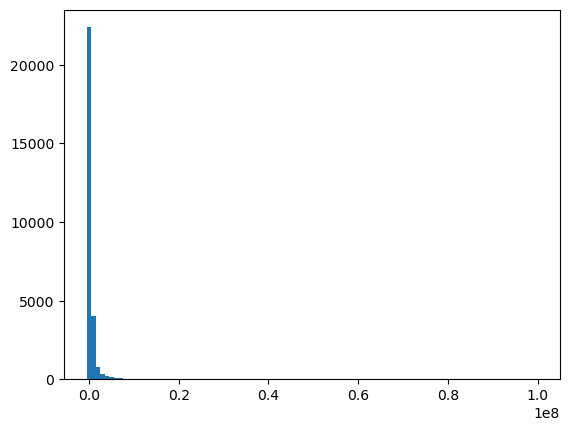

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64

In [170]:
#2
plt.hist(df['Foreign Gift Amount'], bins = 100)
plt.show()
df['Foreign Gift Amount'].describe()

# The histogram is extremely right skewed with a ton of small gifts based on with a very, very few amount of large gifts, however the largest gift is 100,000,000 dollars which is very interesting.

In [176]:
(df['Gift Type']).value_counts()
print('Proportion of Contract Gifts: ', 17274/(10936+17274+11))
print('Proportion of Monetary Gifts: ',10936/(10936+17274+11))
print('Proportion of Real Estate Gifts: ',11/(10936+17274+11))

Proportion of Contract Gifts:  0.6120973742957372
Proportion of Monetary Gifts:  0.3875128450444704
Proportion of Real Estate Gifts:  0.00038978065979235324


In [189]:
#4
count = (df.groupby('Country of Giftor').size().sort_values(ascending=False).head(15))
print(count)


Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
dtype: int64


In [190]:
# also #4

amount = (df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15))
print(amount)

Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64


Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64


(array([3., 1., 2., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([3.01527419e+08, 3.25055321e+08, 3.48583222e+08, 3.72111124e+08,
        3.95639026e+08, 4.19166928e+08, 4.42694829e+08, 4.66222731e+08,
        4.89750633e+08, 5.13278534e+08, 5.36806436e+08, 5.60334338e+08,
        5.83862239e+08, 6.07390141e+08, 6.30918043e+08, 6.54445944e+08,
        6.77973846e+08, 7.01501748e+08, 7.25029650e+08, 7.48557551e+08,
        7.72085453e+08, 7.95613355e+08, 8.19141256e+08, 8.42669158e+08,
        8.66197060e+08, 8.89724962e+08, 9.13252863e+08, 9.36780765e+08,
        9.60308667e+08, 9.83836568e+08, 1.00736447e+09, 1.03089237e+09,
        1.05442027e+09, 1.07794818e+09, 1.10147608e+09, 1.12500398e+09,
        1.14853188e+09, 1.17205978e+09, 1.19558768e+09, 1.21911559e+09,
        1.24264349e+09, 1.26617139e+09, 1.28969929e+09

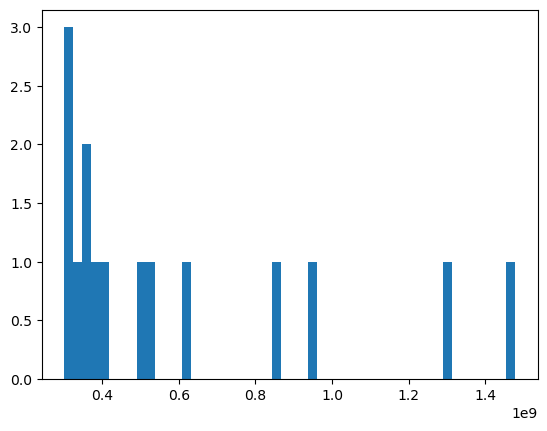

In [193]:
#5

inst = (df.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15))
print(inst)
plt.hist(inst, bins = 50)


In [ ]:
#6
giftors = (df.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False))
giftors.head(15)


Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

In [ ]:
#1&2

cc = pd.read_csv('data/college_completion.csv')
print(cc['index'].value_counts())
cc.head() #3798 observations and 63 variables

index
3797    1
0       1
1       1
2       1
3       1
       ..
10      1
9       1
8       1
7       1
6       1
Name: count, Length: 3798, dtype: int64


,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [ ]:
#3

pd.crosstab(cc["control"],cc["level"])

# The majority of institutions are 'Private not-for-profit,' 4 year institutions with a close runner up being public 2 year institutions. The least common type of institution is the
# 'Private not-for-profit,' 2 year institutions. I'd say around 60% of institutions are 4 year institutions.

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


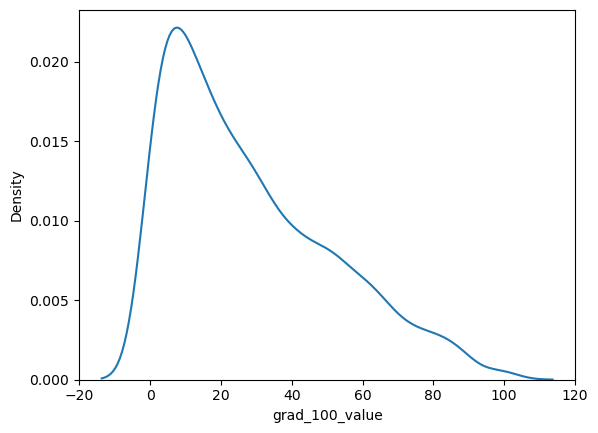

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


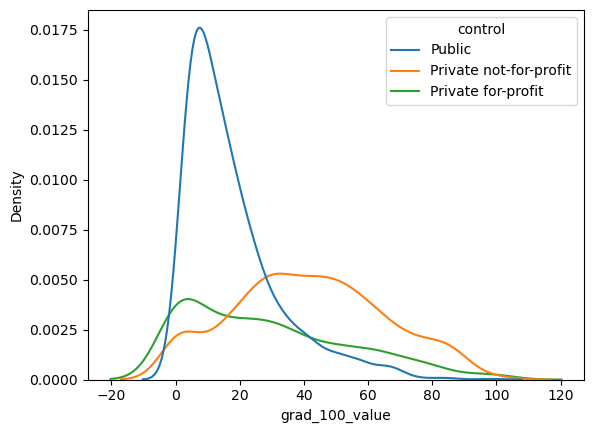

                         count       mean        std  min    25%   50%    75%  \
control                                                                         
Private for-profit       779.0  29.108858  25.601687  0.0   6.95  24.7  46.75   
Private not-for-profit  1189.0  41.660976  23.551231  0.0  25.00  41.0  58.30   
Public                  1499.0  17.430887  14.729443  0.0   6.90  13.2  23.25   

                          max  
control                        
Private for-profit      100.0  
Private not-for-profit  100.0  
Public                   97.8  


In [ ]:
#4
import seaborn as sns
sns.kdeplot(cc['grad_100_value'])
plt.show()
print(cc['grad_100_value'].describe())

sns.kdeplot( data=cc, x='grad_100_value',hue='control')
plt.show()
print(cc.groupby('control')['grad_100_value'].describe())

# When conditioned on control, the private non for profit institutions have the most favorable graduation rates with a mean of around 41.7% and a median of around 41% which is comparably the highest.

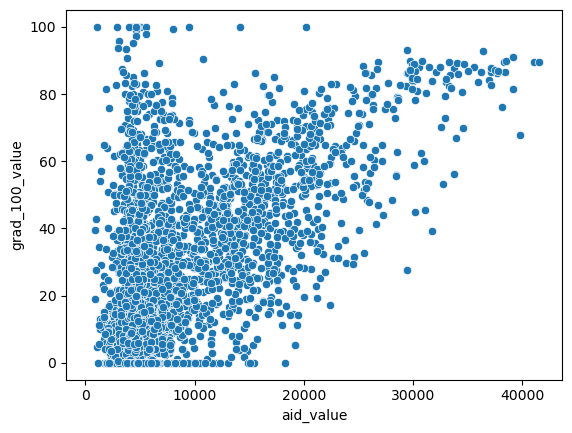

                   aid_value  grad_100_value
aid_value       4.121201e+07    88610.483169
grad_100_value  8.861048e+04      543.483382                 aid_value  grad_100_value
aid_value        1.000000        0.575879
grad_100_value   0.575879        1.000000


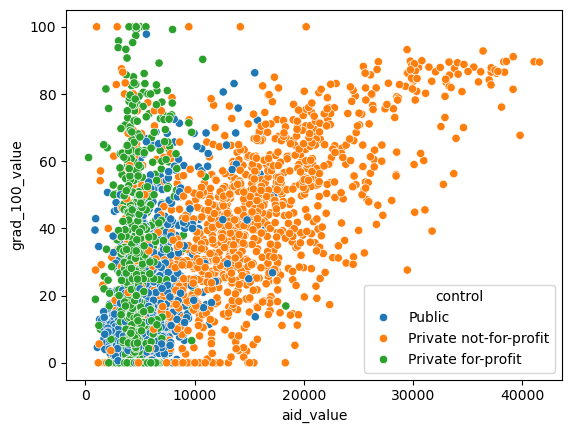

                                          aid_value  grad_100_value
control                                                            
Private for-profit     aid_value       1.957540e+06     6897.524957
                       grad_100_value  6.897525e+03      655.446387
Private not-for-profit aid_value       6.041488e+07   109274.123337
                       grad_100_value  1.092741e+05      554.660462
Public                 aid_value       4.564360e+06    15355.146212
                       grad_100_value  1.535515e+04      216.956489
                                       aid_value  grad_100_value
control                                                         
Private for-profit     aid_value        1.000000        0.188363
                       grad_100_value   0.188363        1.000000
Private not-for-profit aid_value        1.000000        0.601591
                       grad_100_value   0.601591        1.000000
Public                 aid_value        1.000000        0.482481
 

In [ ]:
#5
sns.scatterplot(x=cc['aid_value'],y=cc['grad_100_value'])
plt.show()

cov = cc[['aid_value','grad_100_value']].cov()
corr = cc[['aid_value','grad_100_value']].corr()
print(cov, corr)

sns.scatterplot(data= cc, x='aid_value', y='grad_100_value', hue= 'control')
plt.show()

print( cc.groupby('control')[['aid_value','grad_100_value']].cov())
print( cc.groupby('control')[['aid_value','grad_100_value']].corr())

#Without conditioning on control, the correlation is moderate with 0.576 showing that these instituitions that give out more aid tend to have higher graduation rates. However, when we condition on 
# control, the relationship is strongest for private non for profit institutions with a correlation of 0.602 and very weak for private for profit institutions with a correlation of 0.188. This shows
# that when we break down the data by control, it shows the true values per category instead of averaging them out amongst each other, bringing some values down and other values up a lot.

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$. 

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?